Final Run Statistics: --- 

 Number of steps                                 : 458
 Number of function evaluations                  : 565
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 20
 Number of nonlinear iterations                  : 561
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0585919408822 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 11
 Number of function evaluations                  : 17
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jaco

Perturbation 14

Final Run Statistics: --- 

 Number of steps                                 : 267
 Number of function evaluations                  : 343
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jacobian eval.  : 15
 Number of error test failures                   : 14
 Number of nonlinear iterations                  : 339
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.019674084836 seconds.
Perturbation 15

Final Run Statistics: --- 

 Number of steps                                 : 338
 Number of function evaluations                  : 433
 Number of Jacobian evaluations                  : 7
 Number of functio

kotte_model.py:283: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:300: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/\
kotte_model.py:404: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:421: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/\
kotte_model.py:530: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:548: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/ \
kotte_model.py:652: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:669: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x

Identifiability for Dataset 194 of 500

Identifiability for Dataset 195 of 500

Identifiability for Dataset 196 of 500

Identifiability for Dataset 197 of 500

Identifiability for Dataset 198 of 500

Identifiability for Dataset 199 of 500

Identifiability for Dataset 200 of 500

Identifiability for Dataset 201 of 500

Identifiability for Dataset 202 of 500

Identifiability for Dataset 203 of 500

Identifiability for Dataset 204 of 500

Identifiability for Dataset 205 of 500

Identifiability for Dataset 206 of 500

Identifiability for Dataset 207 of 500

Identifiability for Dataset 208 of 500

Identifiability for Dataset 209 of 500

Identifiability for Dataset 210 of 500

Identifiability for Dataset 211 of 500

Identifiability for Dataset 212 of 500

Identifiability for Dataset 213 of 500

Identifiability for Dataset 214 of 500

Identifiability for Dataset 215 of 500

Identifiability for Dataset 216 of 500

Identifiability for Dataset 217 of 500

Identifiability for Dataset 218 of 500



kotte_model.py:851: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


Original Data sets that can detect 11 parameters: 2
Combination Data sets for more parameters: 0
Original Data sets that can detect 10 parameters: 8
Combination Data sets for more parameters: 861
Original Data sets that can detect 9 parameters: 61
Combination Data sets for more parameters: 21696
Original Data sets that can detect 8 parameters: 72
Combination Data sets for more parameters: 39196
Original Data sets that can detect 7 parameters: 79
Combination Data sets for more parameters: 62499
Original Data sets that can detect 6 parameters: 47
Combination Data sets for more parameters: 54240
Original Data sets that can detect 5 parameters: 50
Combination Data sets for more parameters: 68441
Original Data sets that can detect 4 parameters: 70
Combination Data sets for more parameters: 108105
Original Data sets that can detect 3 parameters: 67
Combination Data sets for more parameters: 118905
Original Data sets that can detect 2 parameters: 27
Combination Data sets for more parameters: 

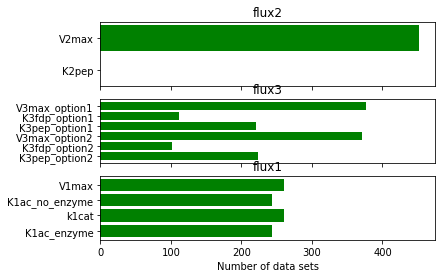

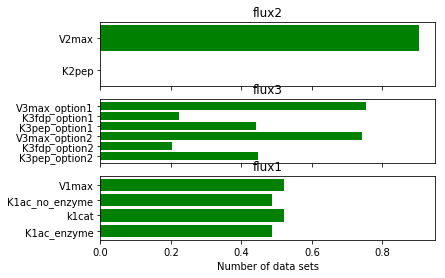

Parameter 0
Parameter 1
Parameter 2
Parameter 3
Parameter 4
Parameter 5
Parameter 6
Parameter 7
Parameter 8
Parameter 9
Parameter 10
Parameter 11


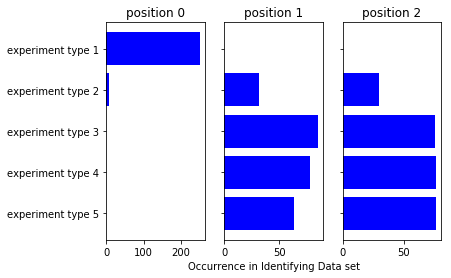

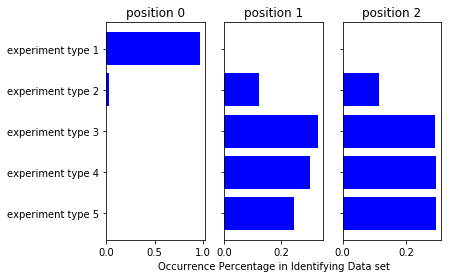

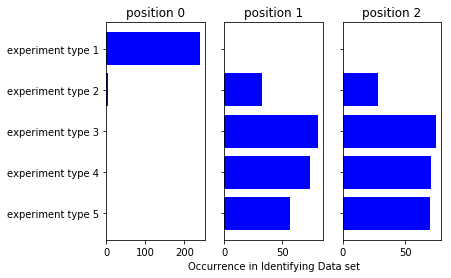

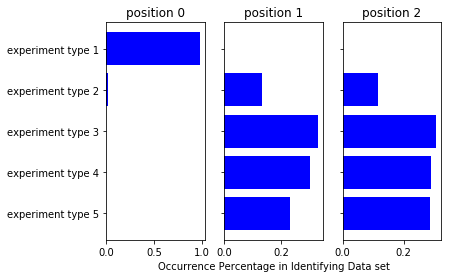

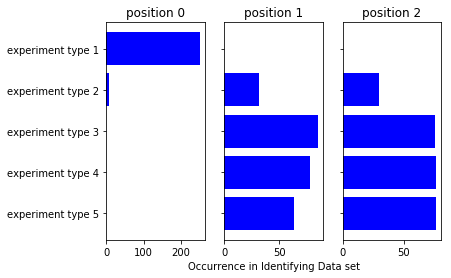

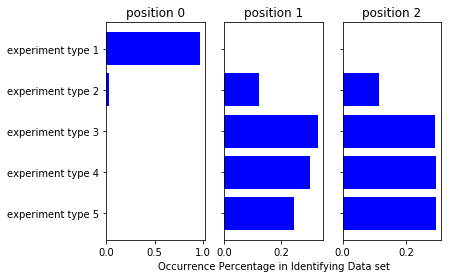

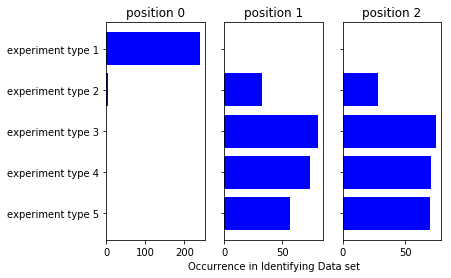

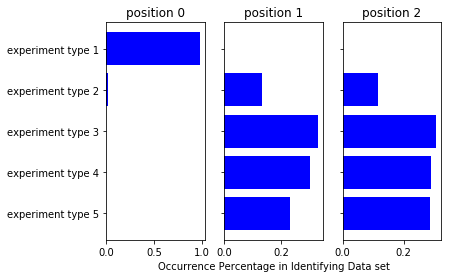

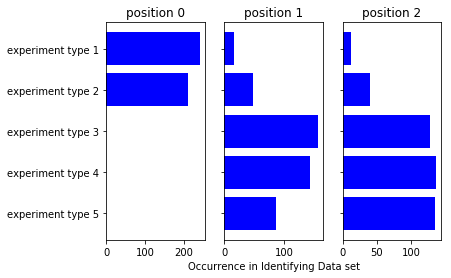

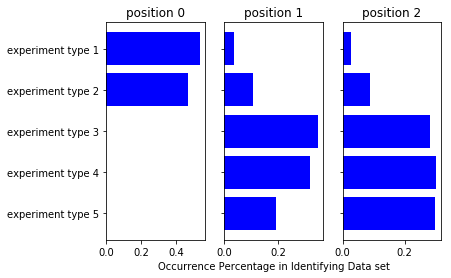

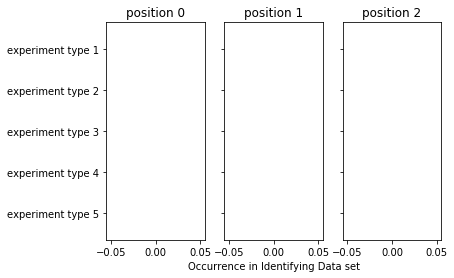

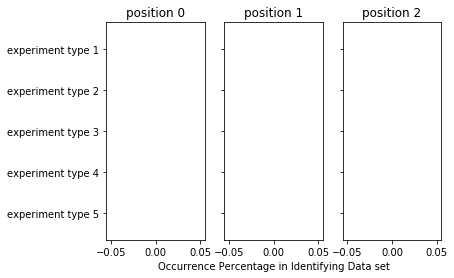

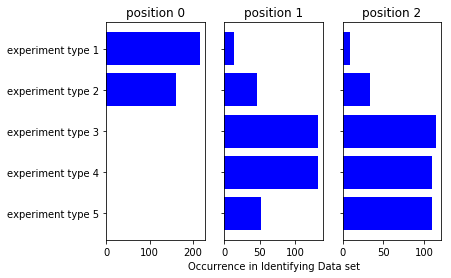

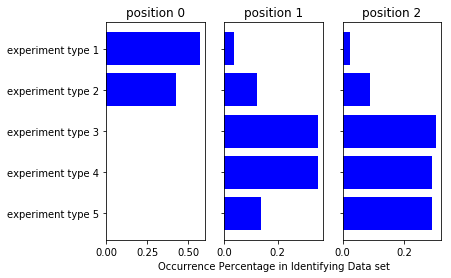

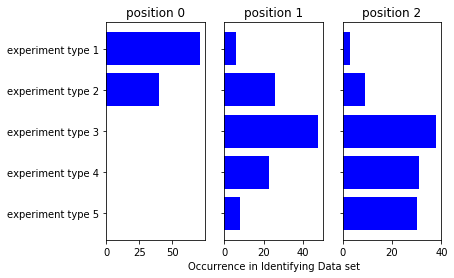

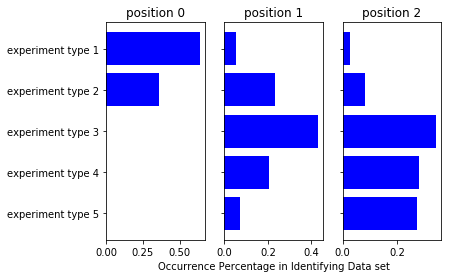

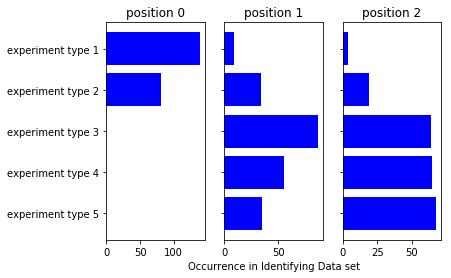

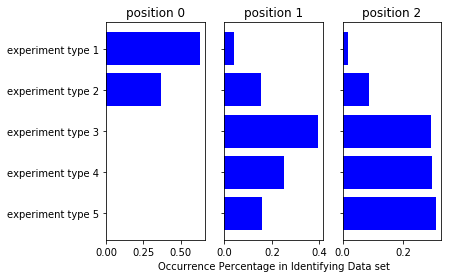

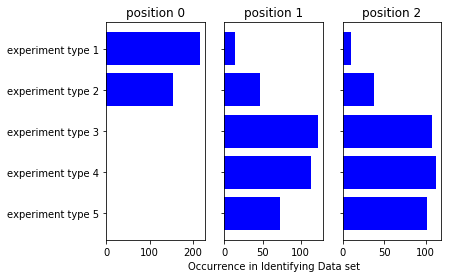

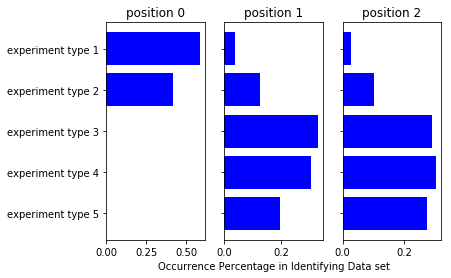

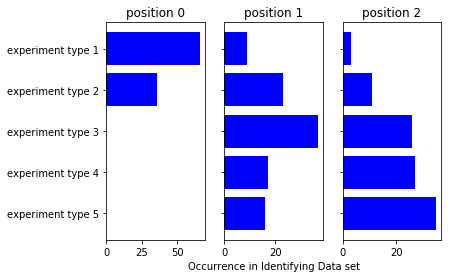

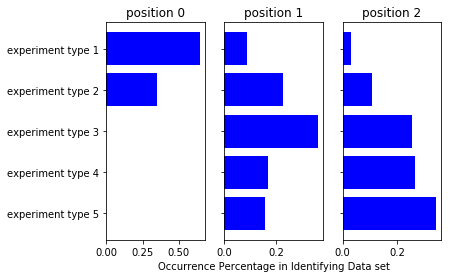

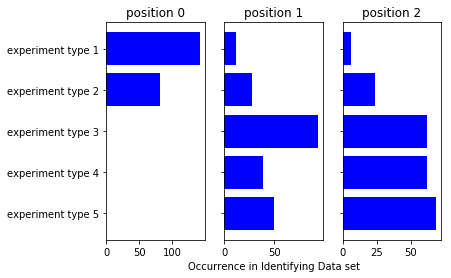

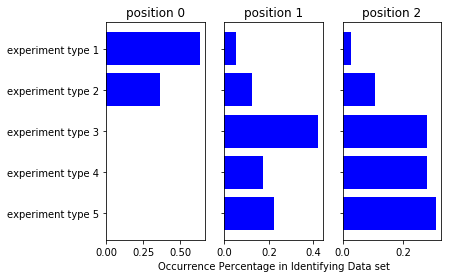

In [2]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import arrange_experimental_data
from process_ident_data import process_info
from process_ident_data import flux_parameter_plot_data

from plot_ident_results import flux_parameter_plot

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# choose numbr of experimental datasets for which identifiability is to be calculated
choose = 500
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=500)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info(ident_details,
                                                                               experimental_datasets,
                                                                               perturbation_details)

# plot results
# file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
# plot parameters for each flux and the number of data sets that enable their identification
# get data for plots
total_ident_data, fraction_ident_data, all_boolean_p_id = flux_parameter_plot_data(original_data_ident, 1)
# plot
flux_parameter_plot(total_ident_data)
flux_parameter_plot(fraction_ident_data)

# get different classes of datasets (containing different experiments)
from process_ident_data import experiments_in_ident_data
experiment_sets = [[0], [1, 2], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
exp_data_parameter_info = experiments_in_ident_data(all_boolean_p_id,
                                          experimental_datasets,
                                          experiment_sets, [])

from process_ident_data import experiment_position_based_info
all_parameter_position_based_info = experiment_position_based_info(exp_data_parameter_info)

from plot_ident_results import parameter_experiment_type_plot
parameter_experiment_type_plot(all_parameter_position_based_info)